In [224]:
import os

# data frame manipulation
import numpy as np
import pandas as pd
# from collections import defaultdict

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import scipy as sp
from scipy import stats
import statsmodels.api as sm
# import statsmodels.formula.api as smf

# models
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression
# from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# from boruta import BorutaPy

os.chdir('C:/Users/jsbae/410project/data')

In [198]:
# load csv data into pandas Dataframe
df = pd.DataFrame(pd.read_csv('Life Expectancy Data.csv'))

In [189]:
# df.describe()

# this lists the percentage of null values that make up each column
df.isnull().sum() * 100 / df.isnull().count()
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [199]:
def clean_data(df):
    df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                       "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                       "Measles ":"Measles", "under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                       " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                       "Total expenditure":"Tot_Exp"},inplace=True)
    
    # France and Canada were mislabeled as developing
    df[df['Country']=='France']['Status'].replace('Developing','Developed')
    df[df['Country']=='Canada']['Status'].replace('Developing','Developed')
   
    mislabeled_countries = ['Canada', 'Chile', 'Greece', 'Finland', 'France', 'Israel', 'Republic of Korea']
    
    # Loop through and change them to Developed
    for country in mislabeled_countries:
        df['Status'].loc[df.Country == country] = 'Developed'
        
    df.fillna(df.median(), inplace=True)

    # one-hot encode the status variable
    df['Status'] = preprocessing.LabelEncoder().fit_transform(df['Status'])
    
    # without country name
    df.drop(columns=['Country'], inplace=True)
    
    return df

In [200]:
# It seems because of the large difference in scales and units, standardizing is a better transformation for this data set.
def scale_data(df):
    col_names = df.columns
    
    # Create the RobustScaler object (RobustScaler is based on percentiles and hence not easily influenced by outliers)
    scaler = preprocessing.RobustScaler()
    
    # Fit your data on the scaler object
    scaled_df = scaler.fit_transform(df)
    
    scaled_df = pd.DataFrame(scaled_df, columns=col_names)
    return scaled_df


In [201]:
df = scale_data(clean_data(df))

C:\Users\jsbae\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [177]:
for column in df.columns:
    print(f"SD of {column}:", df[column].std())

SD of Year: 0.576730117532259
SD of Status: 0.40906856111300577
SD of Life_Expectancy: 0.7668641135602811
SD of Adult_Mortality: 0.811021014123889
SD of Infant_Deaths: 5.360295514245439
SD of Alcohol: 0.6227782011701428
SD of Percentage_Exp: 4.55057871278474
SD of HepatitisB: 1.642641715799674
SD of Measles: 31.831429532920307
SD of BMI: 0.5431982261059245
SD of Under_Five_Deaths: 5.730198157347564
SD of Polio: 1.229850823734654
SD of Tot_Exp: 0.8110710589349946
SD of Diphtheria: 1.2450295767359467
SD of HIV/AIDS: 7.2539779015522186
SD of GDP: 3.166673612928822
SD of Population: 12.969154732105038
SD of thinness_1to19_years: 0.7995674039634001
SD of thinness_5to9_years: 0.8010453231751858
SD of Income_Comp_Of_Resources: 0.7661610021317182
SD of Schooling: 0.859247091721281


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                        2938 non-null float64
Status                      2938 non-null float64
Life_Expectancy             2938 non-null float64
Adult_Mortality             2938 non-null float64
Infant_Deaths               2938 non-null float64
Alcohol                     2938 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2938 non-null float64
Measles                     2938 non-null float64
BMI                         2938 non-null float64
Under_Five_Deaths           2938 non-null float64
Polio                       2938 non-null float64
Tot_Exp                     2938 non-null float64
Diphtheria                  2938 non-null float64
HIV/AIDS                    2938 non-null float64
GDP                         2938 non-null float64
Population                  2938 non-null float64
thinness_1to19_years        2938 non-null f

In [10]:
def pairplots(df):
    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Adult_Mortality', 'Infant_Deaths', 'Population', 'Schooling'])
    plt.savefig('scaled_all_demo.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['HepatitisB', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS'])
    plt.savefig('scaled_all_vaccine.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['GDP', 'Tot_Exp', 'Income_Comp_Of_Resources', 'Percentage_Exp'])
    plt.savefig('scaled_all_economic.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Alcohol', 'thinness_1to19_years', 'thinness_5to9_years', 'Under_Five_Deaths', 'BMI'])
    plt.savefig('scaled_all_other.png')

In [32]:
"""
From the graphs, I notice a few variables that stand out:
Negatively correlated: Infant deaths, HIV, thinness (both), under five deaths
Positively correlated: Schooling, GDP(?), income composition of resources, BMI
"""

Year        Status  Life_Expectancy  Adult_Mortality  \
count  1.871000e+03  1.871000e+03     1.871000e+03     1.871000e+03   
mean   1.106948e-14 -1.151226e-15    -1.644863e-16    -3.607780e-17   
std    1.000267e+00  1.000267e+00     1.000267e+00     1.000267e+00   
min   -1.650916e+00 -2.684426e+00    -3.278470e+00    -1.591072e+00   
25%   -7.970492e-01  3.725192e-01    -5.982316e-01    -7.357201e-01   
50%    5.681799e-02  3.725192e-01     3.040268e-01    -7.855954e-02   
75%    9.106852e-01  3.725192e-01     6.490079e-01     6.620500e-01   
max    1.551086e+00  3.725192e-01     2.387182e+00     2.706549e+00   

       Infant_Deaths       Alcohol  Percentage_Exp    HepatitisB  \
count   1.871000e+03  1.871000e+03    1.871000e+03  1.871000e+03   
mean    2.619201e-16  1.789055e-16    2.088121e-16 -3.234837e-16   
std     1.000267e+00  1.000267e+00    1.000267e+00  1.000267e+00   
min    -6.247994e-01 -1.180426e+00   -5.884675e-01 -3.615773e+00   
25%    -6.247994e-01 -9.223106e-01   -5.835080e-01 -2.025670e-03   
50%    -4.982090e-01 -1.123115e-01   -4.432238e-01  3.505350e-01   
75%     7.144818e-02  6.905573e-01    1.477274e-01  5.268154e-01   
max     5.388248e+00  2.367598e+00    6.094716e+00  6.590257e-01   

            Measles           BMI  ...         Polio       Tot_Exp  \
count  1.871000e+03  1.871000e+03  ...  1.871000e+03  1.871000e+03   
mean   3.635669e-16  2.407956e-16  ... -1.496517e-16  4.357225e-16   
std    1.000267e+00  1.000267e+00  ...  1.000267e+00  1.000267e+00   
min   -2.893542e-01 -2.086243e+00  ... -3.547812e+00 -2.452137e+00   
25%   -2.893542e-01 -8.457749e-01  ... -8.586420e-02 -6.476164e-01   
50%   -2.876871e-01  2.819230e-01  ...  3.961792e-01  2.240535e-02   
75%   -2.240605e-01  7.974421e-01  ...  5.714677e-01  6.070060e-01   
max    8.737286e+00  1.973470e+00  ...  6.591120e-01  2.278056e+00   

         Diphtheria      HIV/AIDS           GDP    Population  \
count  1.871000e+03  1.871000e+03  1.871000e+03  1.871000e+03   
mean  -6.613274e-17  8.212446e-16  2.981165e-16 -2.158734e-16   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -3.531086e+00 -4.691100e-01 -8.113042e-01 -5.477603e-01   
25%   -7.300596e-02 -4.691100e-01 -6.467903e-01 -4.943555e-01   
50%    4.024800e-01 -4.691100e-01 -3.620203e-01 -3.473781e-01   
75%    5.753840e-01 -1.696031e-01  2.047409e-01 -7.855858e-02   
max    6.618360e-01  4.847136e+00  4.601451e+00  5.214623e+00   

       thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
count          1.871000e+03         1.871000e+03              1.871000e+03   
mean          -4.307381e-16         1.929094e-16             -4.403509e-16   
std            1.000267e+00         1.000267e+00              1.000267e+00   
min           -1.454845e+00        -1.455416e+00             -3.064412e+00   
25%           -8.111369e-01        -8.460290e-01             -4.056321e-01   
50%           -2.431589e-01        -2.366422e-01              2.707457e-01   
75%            8.549318e-01         8.678713e-01              6.347599e-01   
max            2.748192e+00         2.200905e+00              1.598906e+00   

          Schooling  
count  1.871000e+03  
mean   1.764726e-16  
std    1.000267e+00  
min   -3.951205e+00  
25%   -4.622777e-01  
50%    1.358240e-01  
75%    6.342422e-01  
max    2.063041e+00  

[8 rows x 21 columns]

In [101]:
columns = df.drop(columns=['Status']).columns
for column, i in zip(columns,range(len(columns))):
    plt.subplot(5,4,i+1)
    sns.distplot(df[column])  
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(20,20)})

plt.savefig('distplot.png')

ValueError: `bins` must increase monotonically, when an array

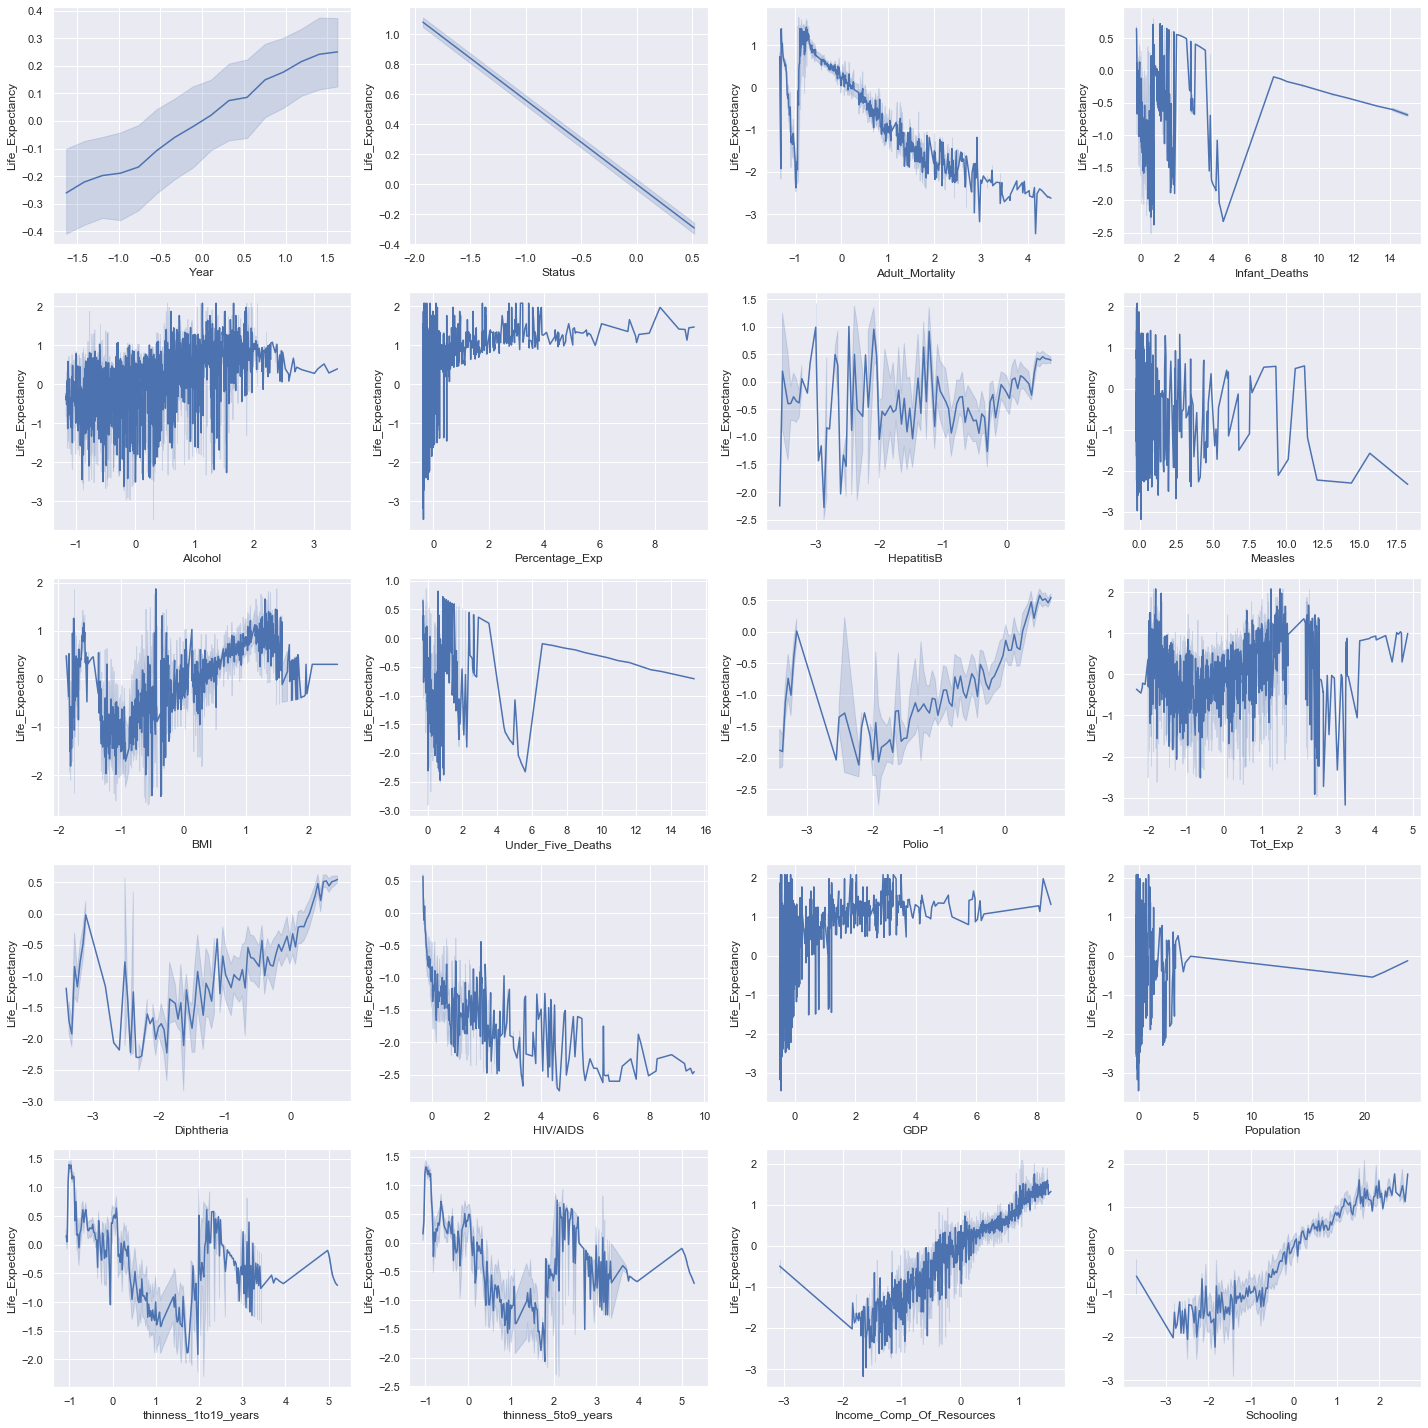

In [103]:
columns = df.drop(columns=['Life_Expectancy']).columns
for column, i in zip(columns,range(len(columns))):
    plt.subplot(5,4,i+1)
    sns.lineplot(df[column], df['Life_Expectancy'])  
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(20,20)})

plt.savefig('lineplot.png')

In [97]:
# use pearson's r to get correlation
# spearman doesn't assume normal dist

def compute_spearman(df):
    correlation_coeff = list()
    for variable in df.columns:
        _, p_val = sp.stats.spearmanr(df[variable], df['Life_Expectancy'])
        correlation_coeff.append([variable, p_val])
    return sorted(correlation_coeff, key=lambda x: x[1])

# according to spearman R: adult mortality, HIV/AIDS, income_comp, schooling, under 5 deaths, and thinness play the biggest roles
compute_spearman(df)


[['Status', 0.0],
 ['Life_Expectancy', 0.0],
 ['Adult_Mortality', 0.0],
 ['HIV/AIDS', 0.0],
 ['Income_Comp_Of_Resources', 0.0],
 ['Schooling', 0.0],
 ['Under_Five_Deaths', 2.6695542748012934e-307],
 ['thinness_5to9_years', 7.032608379546386e-303],
 ['thinness_1to19_years', 1.781172273000317e-290],
 ['Infant_Deaths', 1.5653857025847495e-285],
 ['GDP', 6.797666125765049e-284],
 ['BMI', 3.402487976762176e-264],
 ['Diphtheria', 8.833823641765406e-223],
 ['Polio', 8.599712546571468e-214],
 ['Percentage_Exp', 9.272480904123952e-131],
 ['Alcohol', 9.470443682045878e-129],
 ['HepatitisB', 3.1005806341938203e-61],
 ['Tot_Exp', 2.3710848234949152e-55],
 ['Measles', 2.9898347194712915e-54],
 ['Year', 1.3530297332773523e-17],
 ['Population', 9.73076421724408e-05]]

In [164]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True)
# plt.savefig('predictors_heatmap.png')

In [165]:
corr_matrix = df.corr()
corr_matrix['Life_Expectancy'].sort_values(ascending=False)

Life_Expectancy             1.000000
Schooling                   0.713054
Income_Comp_Of_Resources    0.688662
BMI                         0.556901
Diphtheria                  0.472211
Polio                       0.458399
GDP                         0.430461
Alcohol                     0.388918
Percentage_Exp              0.381418
Tot_Exp                     0.208844
Year                        0.170819
HepatitisB                  0.170219
Population                 -0.029014
Measles                    -0.157767
Infant_Deaths              -0.196769
Under_Five_Deaths          -0.222738
thinness_5to9_years        -0.462473
thinness_1to19_years       -0.468002
HIV/AIDS                   -0.556703
Status                     -0.561950
Adult_Mortality            -0.696390
Name: Life_Expectancy, dtype: float64

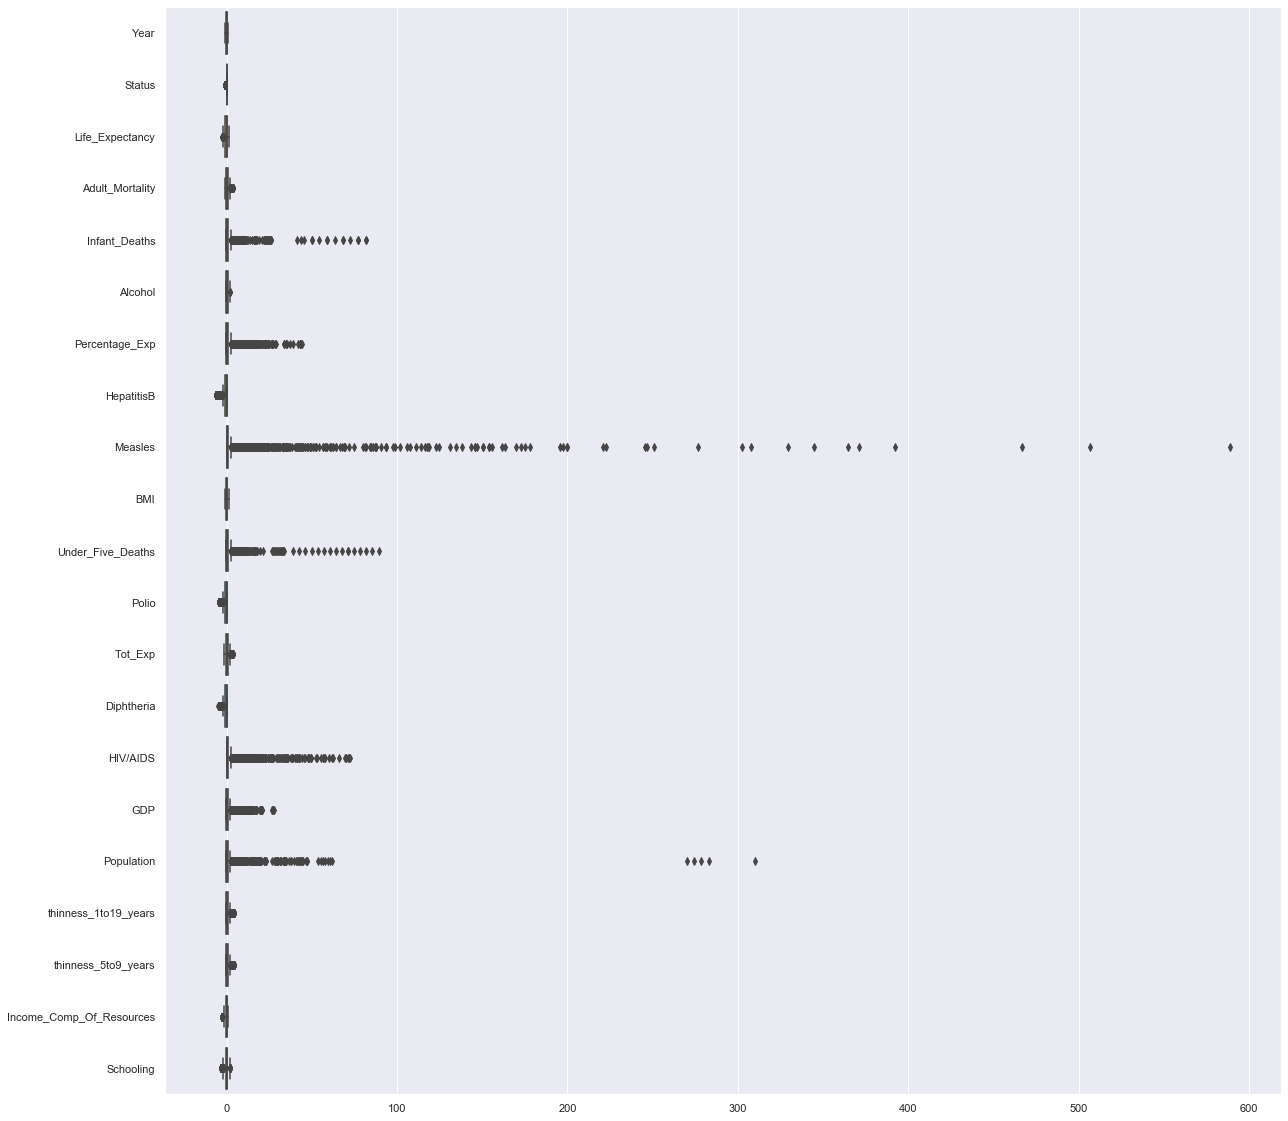

In [202]:
# A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a
# way that facilitates comparisons between variables or across levels of a categorical variable.
# The box shows the quartiles of the dataset while the whiskers extend to show the rest of the
# distribution, except for points that are determined to be “outliers” using a method that is a
# function of the inter-quartile range.

sns.boxplot(data=df, orient='h')
plt.savefig('boxplot_robust_scale.png')

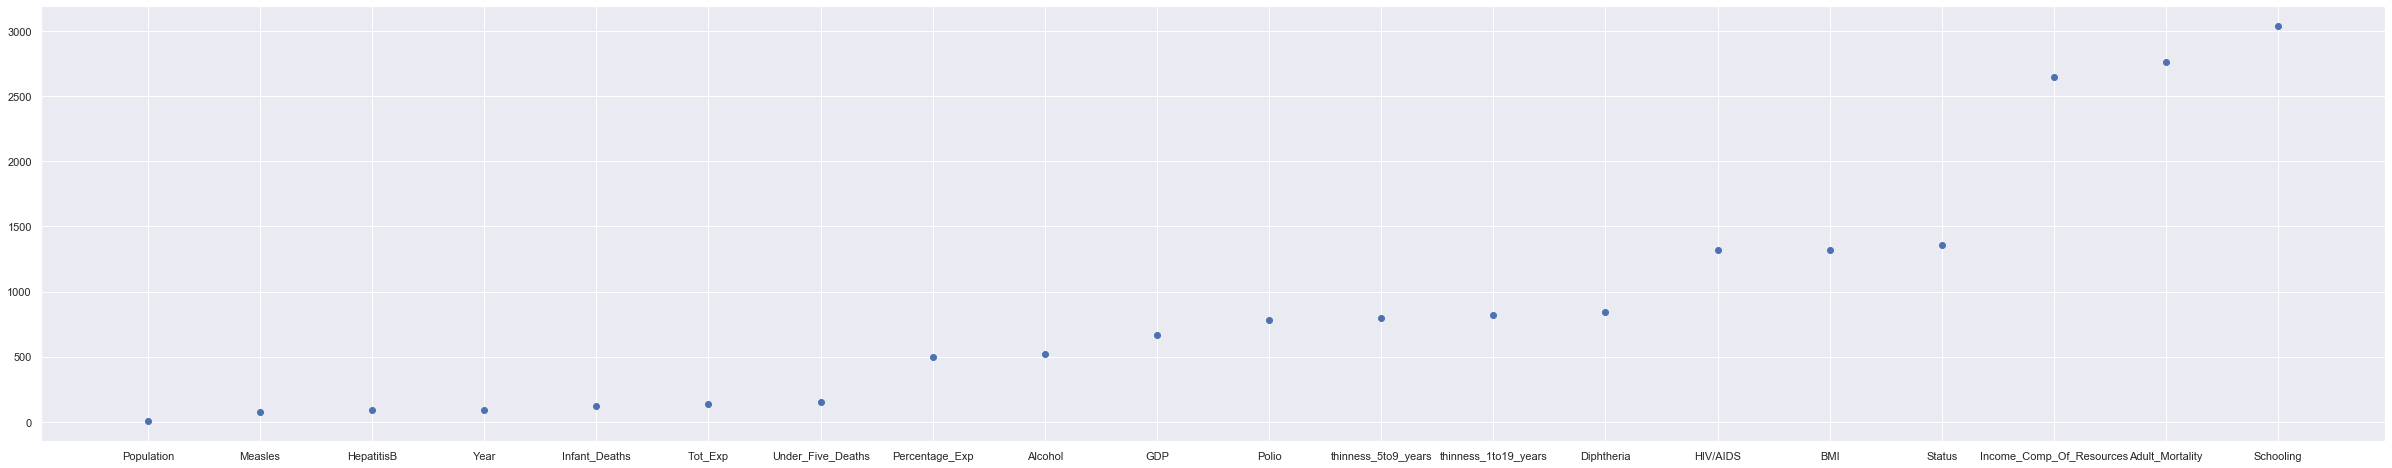

In [110]:
# Univariate linear regression tests. Linear model for testing the individual effect of each of many regressors
# returns F-statistic for each preditor and its p-value
def f_regression_scores(df):
    X = df.drop(columns=['Life_Expectancy'])
    y = df['Life_Expectancy']
    
    F, pval = f_regression(X, y, center=True)
    
    F, pval = sorted(zip(X.columns, F), key=lambda x: x[1]), sorted(zip(X.columns, pval), key=lambda x: x[1])
    return F, pval


F_test, pval = f_regression_scores(df)

plt.figure(figsize=(42, 8))
plt.scatter([x[0] for x in F_test], [x[1] for x in F_test])
plt.savefig('f-values_for_predictors.png')

# pval.remove(('Population', 0.11587862048932632))
# plt.ylim(-0.008, 0.008)
# plt.scatter([x[0] for x in pval], [x[1] for x in pval]) 
# print(plt.ylim())

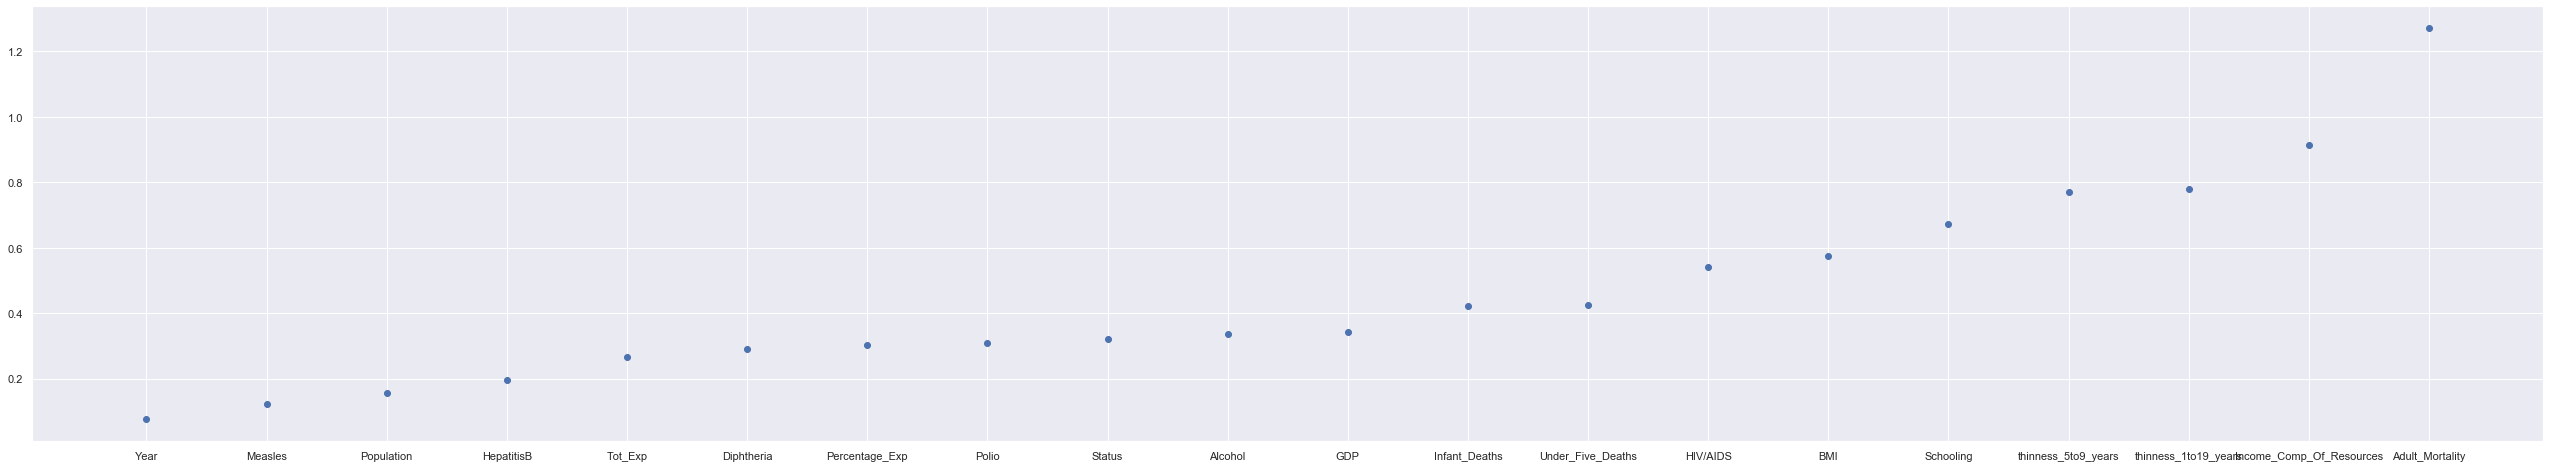

In [115]:
# Estimate mutual information for a continuous target variable.
# Mutual information between two random variables is a non-negative value,
# which measures the dependency between the variables. It is equal to zero
# if and only if two random variables are independent, and higher values mean higher dependency.

def mutual_information(df):
    X = df.drop(columns=['Life_Expectancy'])
    y = df['Life_Expectancy']
    mi = mutual_info_regression(X, y)
    mi = sorted(zip(X.columns, mi), key=lambda x: x[1])
    return mi

plt.figure(figsize=(45, 8))
mi = mutual_information(df)
plt.scatter([x[0] for x in mi], [x[1] for x in mi])
plt.savefig('mutual_info.png')

In [207]:
# defining which variables to drop
# anything with a p-value above 0.05 were taken out of consideration

X = df.drop(columns=['Life_Expectancy'])
y = df['Life_Expectancy']

X1 = sm.add_constant(X)
ols = sm.OLS(y, X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features) > 0):
    p = []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    features_with_max_p = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(features_with_max_p)
        print('Features to be removed:', features_with_max_p)
    else:
        break
        
print('The selected features are:', selected_features)

Features to be removed: Year
Features to be removed: Population
Features to be removed: Alcohol
Features to be removed: Percentage_Exp
Features to be removed: thinness_5to9_years
Features to be removed: Tot_Exp
The selected features are: ['Status', 'Adult_Mortality', 'Infant_Deaths', 'HepatitisB', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1to19_years', 'Income_Comp_Of_Resources', 'Schooling']


In [208]:
print(model.pvalues)

const                        9.631648e-20
Status                       4.966350e-37
Adult_Mortality             3.104703e-121
Infant_Deaths                5.060165e-35
HepatitisB                   1.994357e-05
Measles                      1.243889e-02
BMI                          8.763702e-23
Under_Five_Deaths            4.931177e-36
Polio                        3.604565e-11
Diphtheria                   1.841271e-18
HIV/AIDS                    9.723658e-146
GDP                          6.835837e-08
thinness_1to19_years         1.204296e-02
Income_Comp_Of_Resources     3.687523e-16
Schooling                    2.744756e-54
dtype: float64


In [220]:
# define variables
drop = ['Life_Expectancy', 'Year', 'Alcohol', 'Percentage_Exp', 'Tot_Exp', 'Population']

X = df.drop(columns=drop)
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

# OLS
linear_model = LinearRegression()
fitted_linear = linear_model.fit(X_train, y_train)

# cross-validation fitted models (ridge, lasso, elastic net)
# Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation

# pick from a wide-range of alphas to control regularization
alphas = np.arange(0.1, 10.1, 0.1)

fitted_cross_ridge = RidgeCV(cv=5, alphas=alphas).fit(X_train, y_train)
fitted_cross_lasso = LassoCV(cv=5, alphas=alphas).fit(X_train, y_train)
fitted_cross_elastic = ElasticNetCV(cv=5, alphas=alphas).fit(X_train, y_train)

results_linear = fitted_linear.predict(X_test)
cross_results_ridge = fitted_cross_ridge.predict(X_test)
cross_results_lasso = fitted_cross_lasso.predict(X_test)
cross_results_elastic = fitted_cross_elastic.predict(X_test)


In [217]:
print('Weights for each predictor (OLS):\n', fitted_linear.coef_)
print('Weights for each predictor (ridge):\n', fitted_cross_ridge.coef_)
print('Weights for each predictor (lasso):\n', fitted_cross_lasso.coef_)
print('Weights for each predictor (elastic net):\n', fitted_cross_elastic.coef_)

print(fitted_cross_ridge.alpha_)
print(fitted_cross_lasso.alpha_)
print(fitted_cross_elastic.alpha_)


Weights for each predictor (OLS):
 [-2.50705809e-01 -2.46662479e-01  1.85351140e-01 -1.65697852e-02
 -4.83530139e-04  1.30506668e-01 -1.78601490e-01  4.40557720e-02
  5.48132158e-02 -2.65830032e-02  1.26023661e-02 -2.22474230e-02
  5.66831286e-05  1.22381756e-01  1.85657941e-01]
Weights for each predictor (ridge):
 [-0.24052595 -0.24549414  0.17638641 -0.01665526 -0.00050269  0.1284097
 -0.17002236  0.04455425  0.05539338 -0.02672559  0.01305931 -0.02203205
 -0.00192059  0.12392315  0.18599527]
Weights for each predictor (lasso):
 [-0.         -0.134548   -0.          0.         -0.00133649  0.
 -0.00552794  0.02805837  0.04344218 -0.03847491  0.03575565 -0.
 -0.          0.04600023  0.22659623]
Weights for each predictor (elastic net):
 [-0.         -0.18890691 -0.         -0.         -0.00112206  0.00683485
 -0.00517199  0.04021252  0.05101801 -0.03421985  0.0302949  -0.00680496
 -0.          0.11389599  0.21243808]
10.0
0.1
0.1


In [232]:
# GridSearchCV optimizes parameters with respect to MSE
# running this takes a while...

tuned_parameters = [{'max_depth': [5, 10, 15, 20, 50, 70, 100], 'learning_rate': [0.001, 0.01, 0.1, 0.5], 'n_estimators': [100, 150, 200, 250, 300]}]
MSE_gb = ['mean_squared_error(y_test, y_pred)']

for value in MSE_gb:
    gb_model = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=5)
    gb_model.fit(X_train, y_train)
    y_true, y_pred = y_test, gb_model.predict(X_test)

print('The best hyper-parameters for Gradient Boosting:', gb_model.best_params_)

The best hyper-parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [233]:
# GridSearchCV optimizes parameters with respect to MSE
# running this takes a while...

tuned_parameters = [{'max_depth': [5, 10, 15, 20, 50, 70, 100], 'n_estimators': [10, 25, 50, 100, 150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred)']

for value in MSE_rf:
    rf_model = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5)
    rf_model.fit(X_train, y_train)
    y_true, y_pred = y_test, rf_model.predict(X_test)

print('The best hyper-parameters for Random Forests:', rf_model.best_params_)

The best hyper-parameters for Random Forests: {'max_depth': 50, 'n_estimators': 200}


In [234]:
# fit the models with the best hyper parameters you found

rf_model = RandomForestRegressor(n_estimators = 200, max_depth = 50)
rf_model.fit(X_train, y_train)
random_forest_results = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators = 300, max_depth = 5, learning_rate = 0.1)
gb_model.fit(X_train, y_train)
grad_boost_results = gb_model.predict(X_test)

In [235]:
models = ['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'Gradient Boosting']
all_results = [results_linear, cross_results_ridge, cross_results_lasso, cross_results_elastic, random_forest_results, grad_boost_results]

def error_metrics(output):
    i = 0
    for result in output:
        print(models[i])
        print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, result))
        print("Mean Squared Error:", metrics.mean_squared_error(y_test, result))
        print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, result)))
        print("Coefficient of Determination R^2:", metrics.r2_score(y_test, result))
        i += 1

error_metrics(all_results)

OLS
Mean Absolute Error: 0.22944876628342525
Mean Squared Error: 0.09381752949172623
Root Mean Squared Error: 0.3062964731950504
Coefficient of Determination R^2: 0.839318556347887
Ridge
Mean Absolute Error: 0.22930981270656933
Mean Squared Error: 0.0937859697692771
Root Mean Squared Error: 0.3062449506020909
Coefficient of Determination R^2: 0.8393726087386487
Lasso
Mean Absolute Error: 0.297503719079873
Mean Squared Error: 0.1471510376891799
Root Mean Squared Error: 0.3836027081358784
Coefficient of Determination R^2: 0.7479741653942282
ElasticNet
Mean Absolute Error: 0.26727683723702483
Mean Squared Error: 0.12282804441179977
Root Mean Squared Error: 0.3504683215524618
Coefficient of Determination R^2: 0.7896321976929229
Random Forest
Mean Absolute Error: 0.08608445797673916
Mean Squared Error: 0.018931705979413117
Root Mean Squared Error: 0.13759253605996627
Coefficient of Determination R^2: 0.967575634702279
Gradient Boosting
Mean Absolute Error: 0.08992219164793344
Mean Squared E

1.0000366545583121 -0.01664091938372544
1.0001576014428597 -0.016474304114603395
1.1795068543173624 -0.0031627062907883374
1.096616415545534 -0.005267233155551818


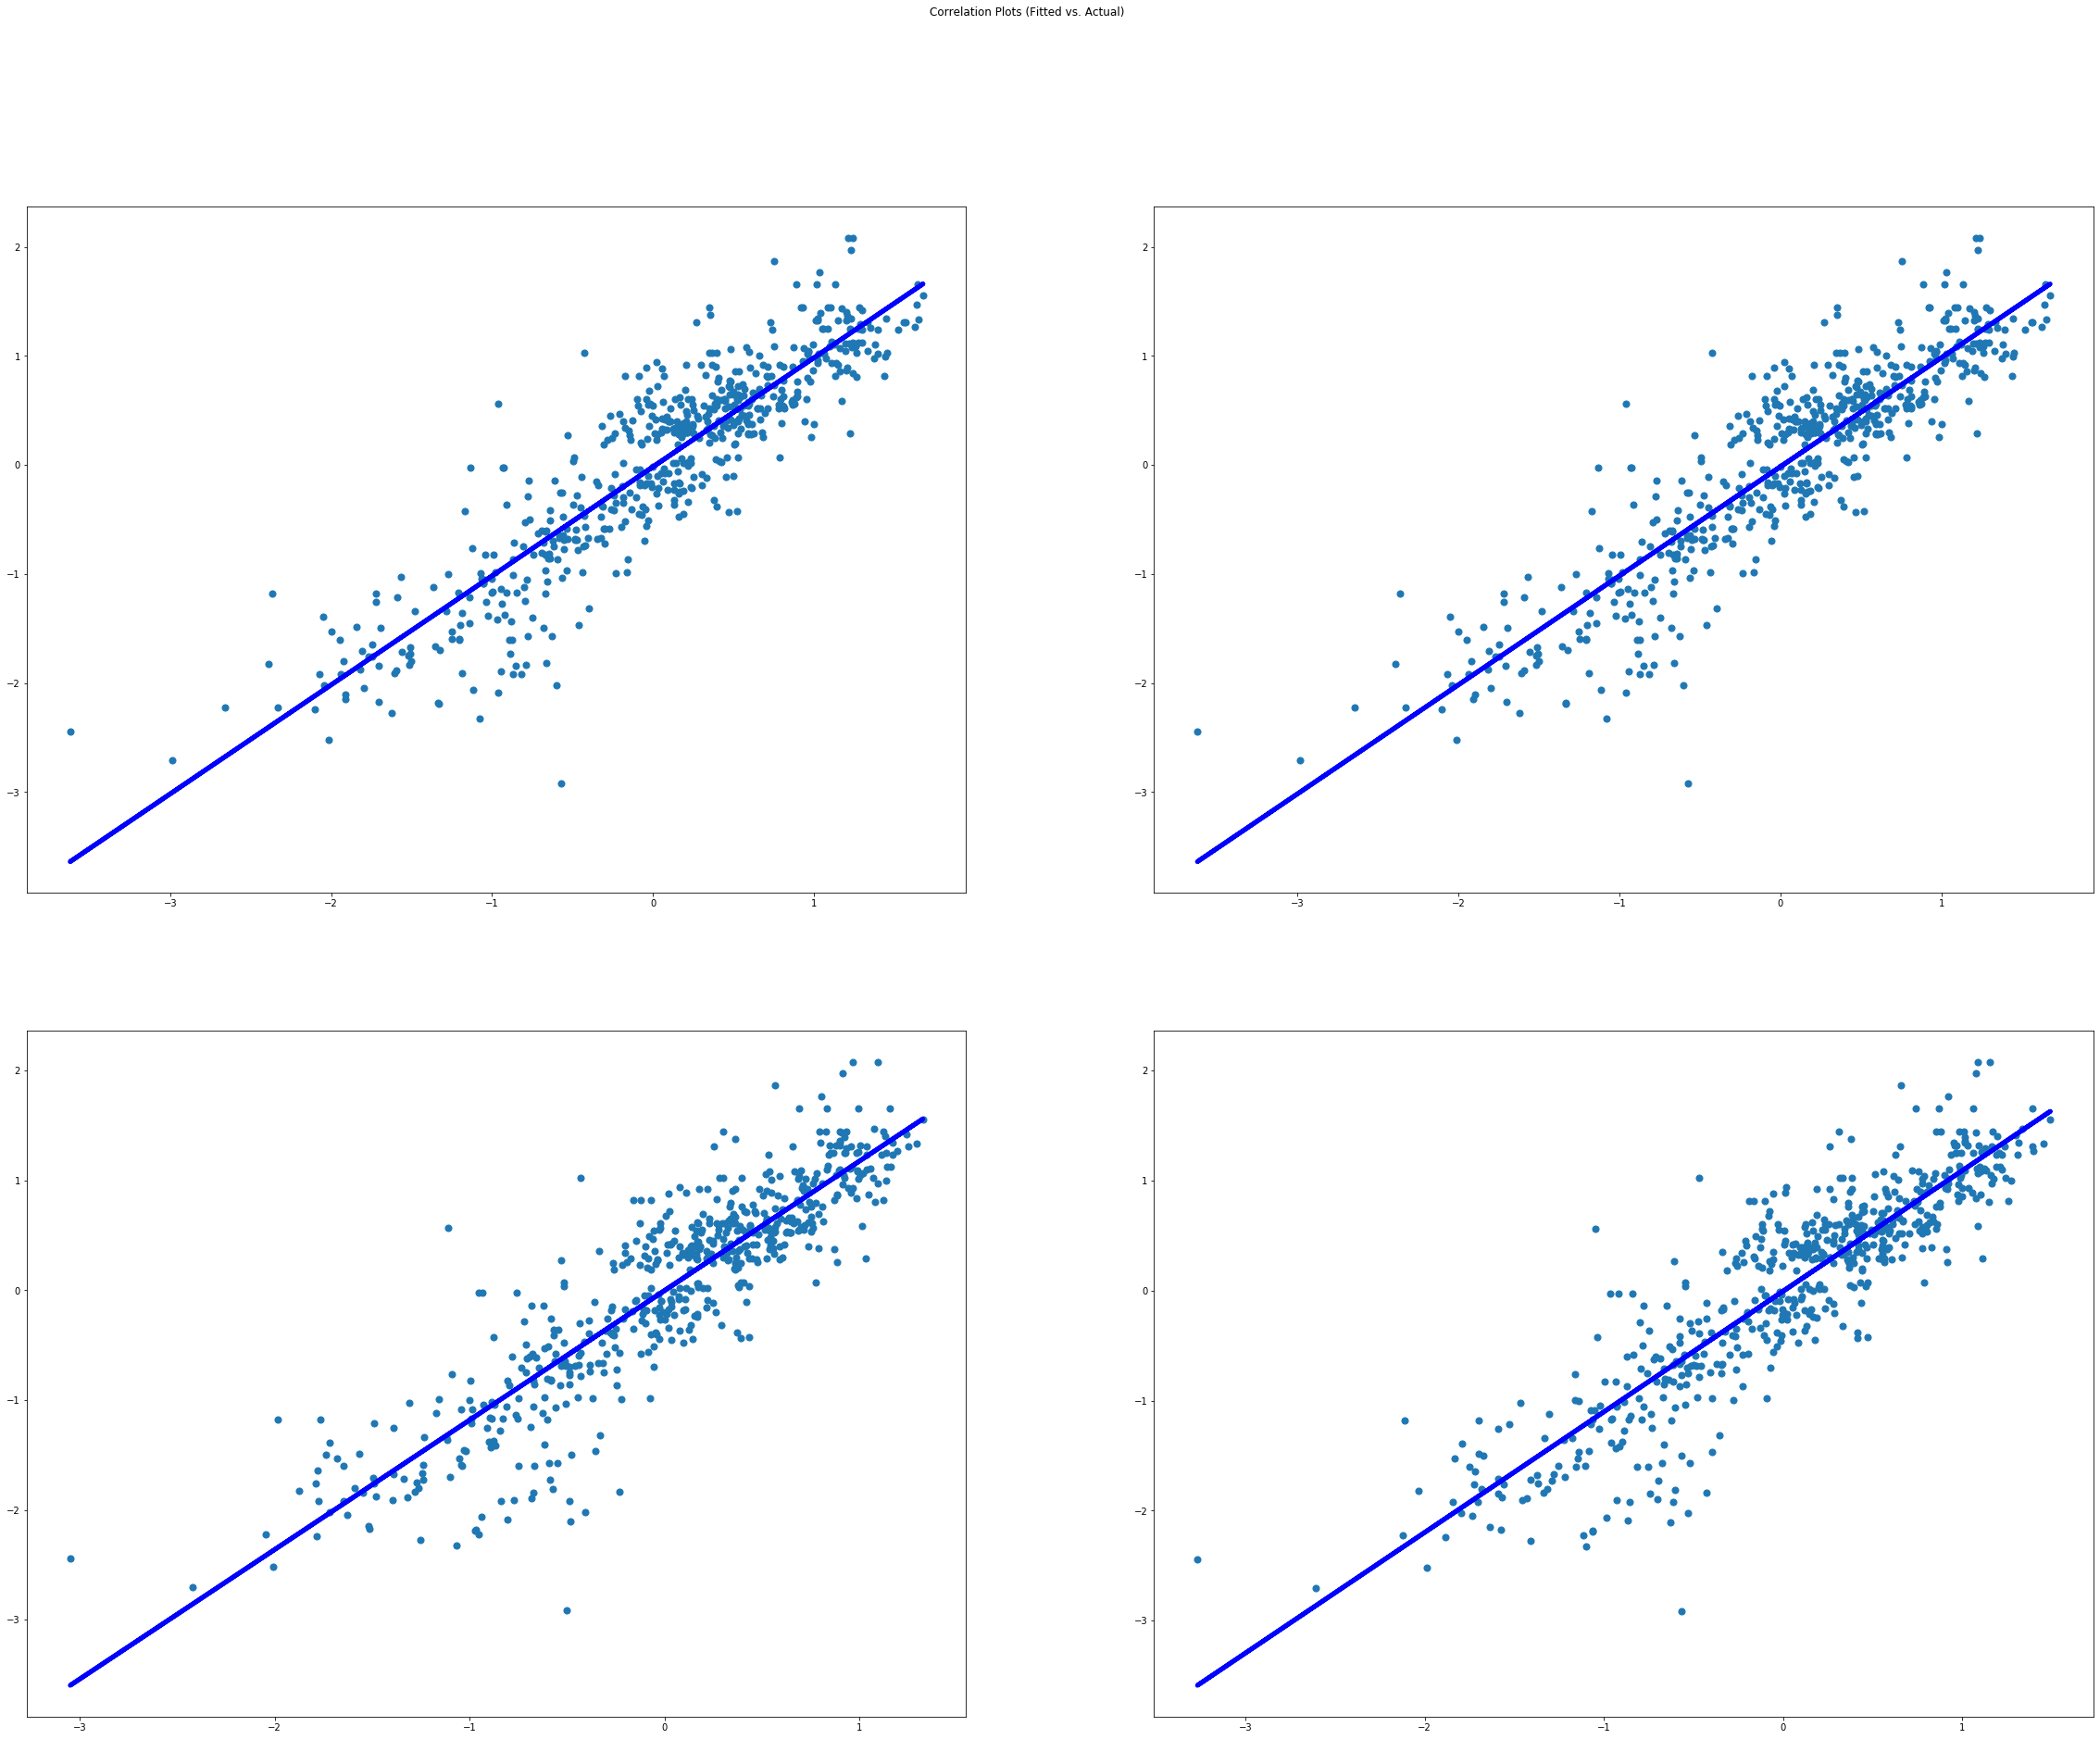

In [117]:
# fitted vs. actual (seems pretty linear)
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(40, 30))
fig.suptitle('Correlation Plots (Fitted vs. Actual)')

ax1.scatter(results_linear, y_test, s=50)
ax1.plot(results_linear, np.poly1d(np.polyfit(results_linear, y_test, 1))((results_linear)), color='blue', linewidth=5)

ax2.scatter(cross_results_ridge, y_test, s=50) 
ax2.plot(cross_results_ridge, np.poly1d(np.polyfit(cross_results_ridge, y_test, 1))((cross_results_ridge)), color='blue', linewidth=5)

ax3.scatter(cross_results_lasso, y_test, s=50)
ax3.plot(cross_results_lasso, np.poly1d(np.polyfit(cross_results_lasso, y_test, 1))((cross_results_lasso)), color='blue', linewidth=5)

ax4.scatter(cross_results_elastic, y_test, s=50)
ax4.plot(cross_results_elastic, np.poly1d(np.polyfit(cross_results_elastic, y_test, 1))((cross_results_elastic)), color='blue', linewidth=5)

# plt.show()
m1, b1 = np.polyfit(results_linear, y_test, 1)
m2, b2= np.polyfit(cross_results_ridge, y_test, 1)
m3, b3 = np.polyfit(cross_results_lasso, y_test, 1)
m4, b4 = np.polyfit(cross_results_elastic, y_test, 1)

# 
print(m1, b1)
print(m2, b2)
print(m3, b3)
print(m4, b4)
"""
slopes and intercept (very close to 1 and 0, respectively)
1.0000366545583121 -0.01664091938372544
1.0001576014428597 -0.016474304114603395
1.1795068543173624 -0.0031627062907883374
1.096616415545534 -0.005267233155551818
"""

plt.savefig('correlation_plots.png')

3.6654558311705385e-05 -0.01664091938372559
0.00015760144286032865 -0.01647430411460342
0.1795068543173622 -0.0031627062907883005
0.09661641554553377 -0.005267233155551831


'\nSlopes are very close to 0\n3.6654558311705385e-05 -0.01664091938372559\n0.00015760144286032865 -0.01647430411460342\n0.1795068543173622 -0.0031627062907883005\n0.09661641554553377 -0.005267233155551831\n'

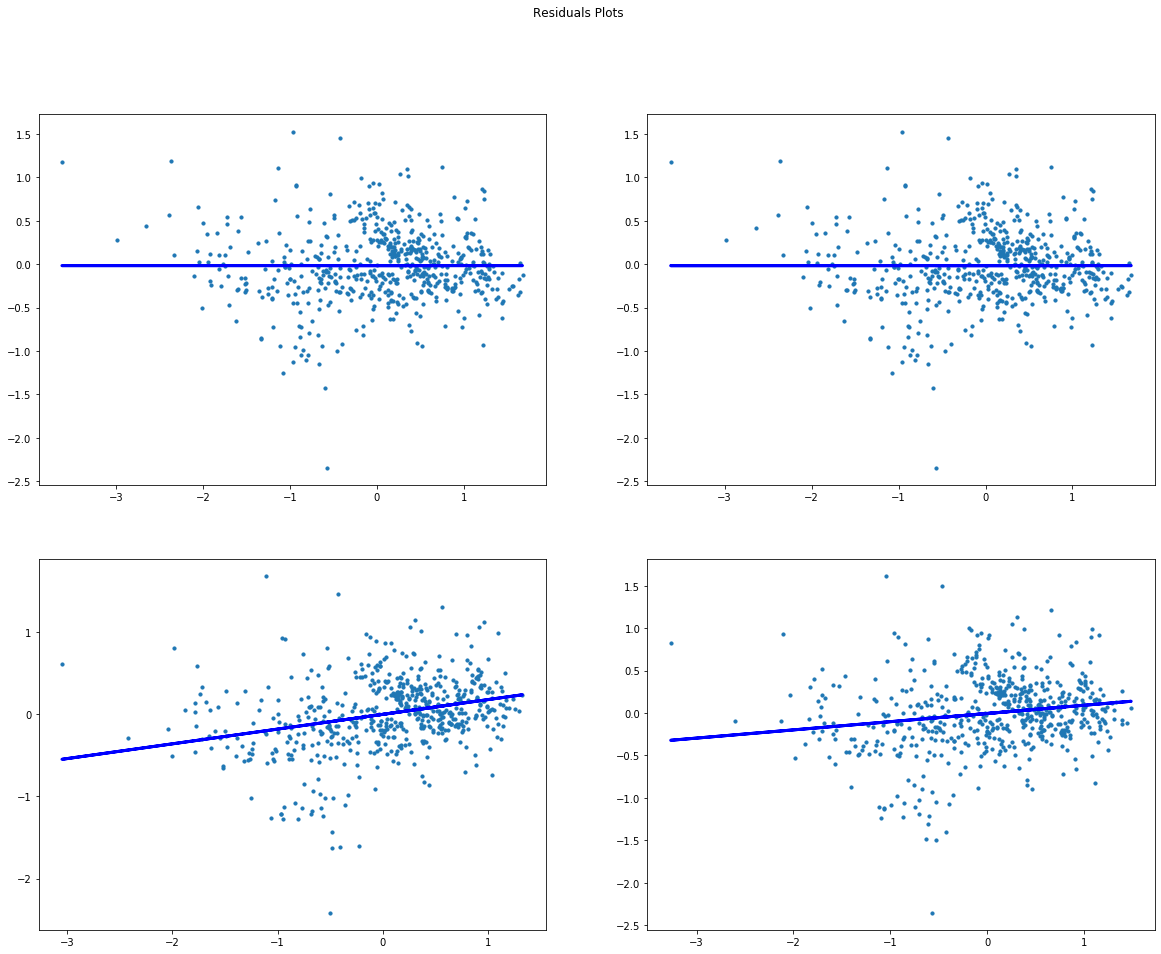

In [118]:
# residuals vs. fitted

linear_residuals = y_test - results_linear
cross_ridge_residuals = y_test - cross_results_ridge
cross_lasso_residuals = y_test - cross_results_lasso
cross_elastic_residuals = y_test - cross_results_elastic

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Residuals Plots')

ax1.scatter(results_linear, linear_residuals, s=10)
ax1.plot(results_linear, np.poly1d(np.polyfit(results_linear, linear_residuals, 1))(results_linear), color='blue', linewidth=3)

ax2.scatter(cross_results_ridge, cross_ridge_residuals, s=10) 
ax2.plot(cross_results_ridge, np.poly1d(np.polyfit(cross_results_ridge, cross_ridge_residuals, 1))(cross_results_ridge), color='blue', linewidth=3)

ax3.scatter(cross_results_lasso, cross_lasso_residuals, s=10) 
ax3.plot(cross_results_lasso, np.poly1d(np.polyfit(cross_results_lasso, cross_lasso_residuals, 1))(cross_results_lasso), color='blue', linewidth=3)

ax4.scatter(cross_results_elastic, cross_elastic_residuals, s=10)
ax4.plot(cross_results_elastic, np.poly1d(np.polyfit(cross_results_elastic, cross_elastic_residuals, 1))(cross_results_elastic), color='blue', linewidth=3)

# plt.show()
plt.savefig('residual_plot.png')

m1, b1 = np.polyfit(results_linear, linear_residuals, 1)
m2, b2= np.polyfit(cross_results_ridge, cross_ridge_residuals, 1)
m3, b3 = np.polyfit(cross_results_lasso, cross_lasso_residuals, 1)
m4, b4 = np.polyfit(cross_results_elastic, cross_elastic_residuals, 1)

print(m1, b1)
print(m2, b2)
print(m3, b3)
print(m4, b4)

"""
Slopes are very close to 0
3.6654558311705385e-05 -0.01664091938372559
0.00015760144286032865 -0.01647430411460342
0.1795068543173622 -0.0031627062907883005
0.09661641554553377 -0.005267233155551831
"""

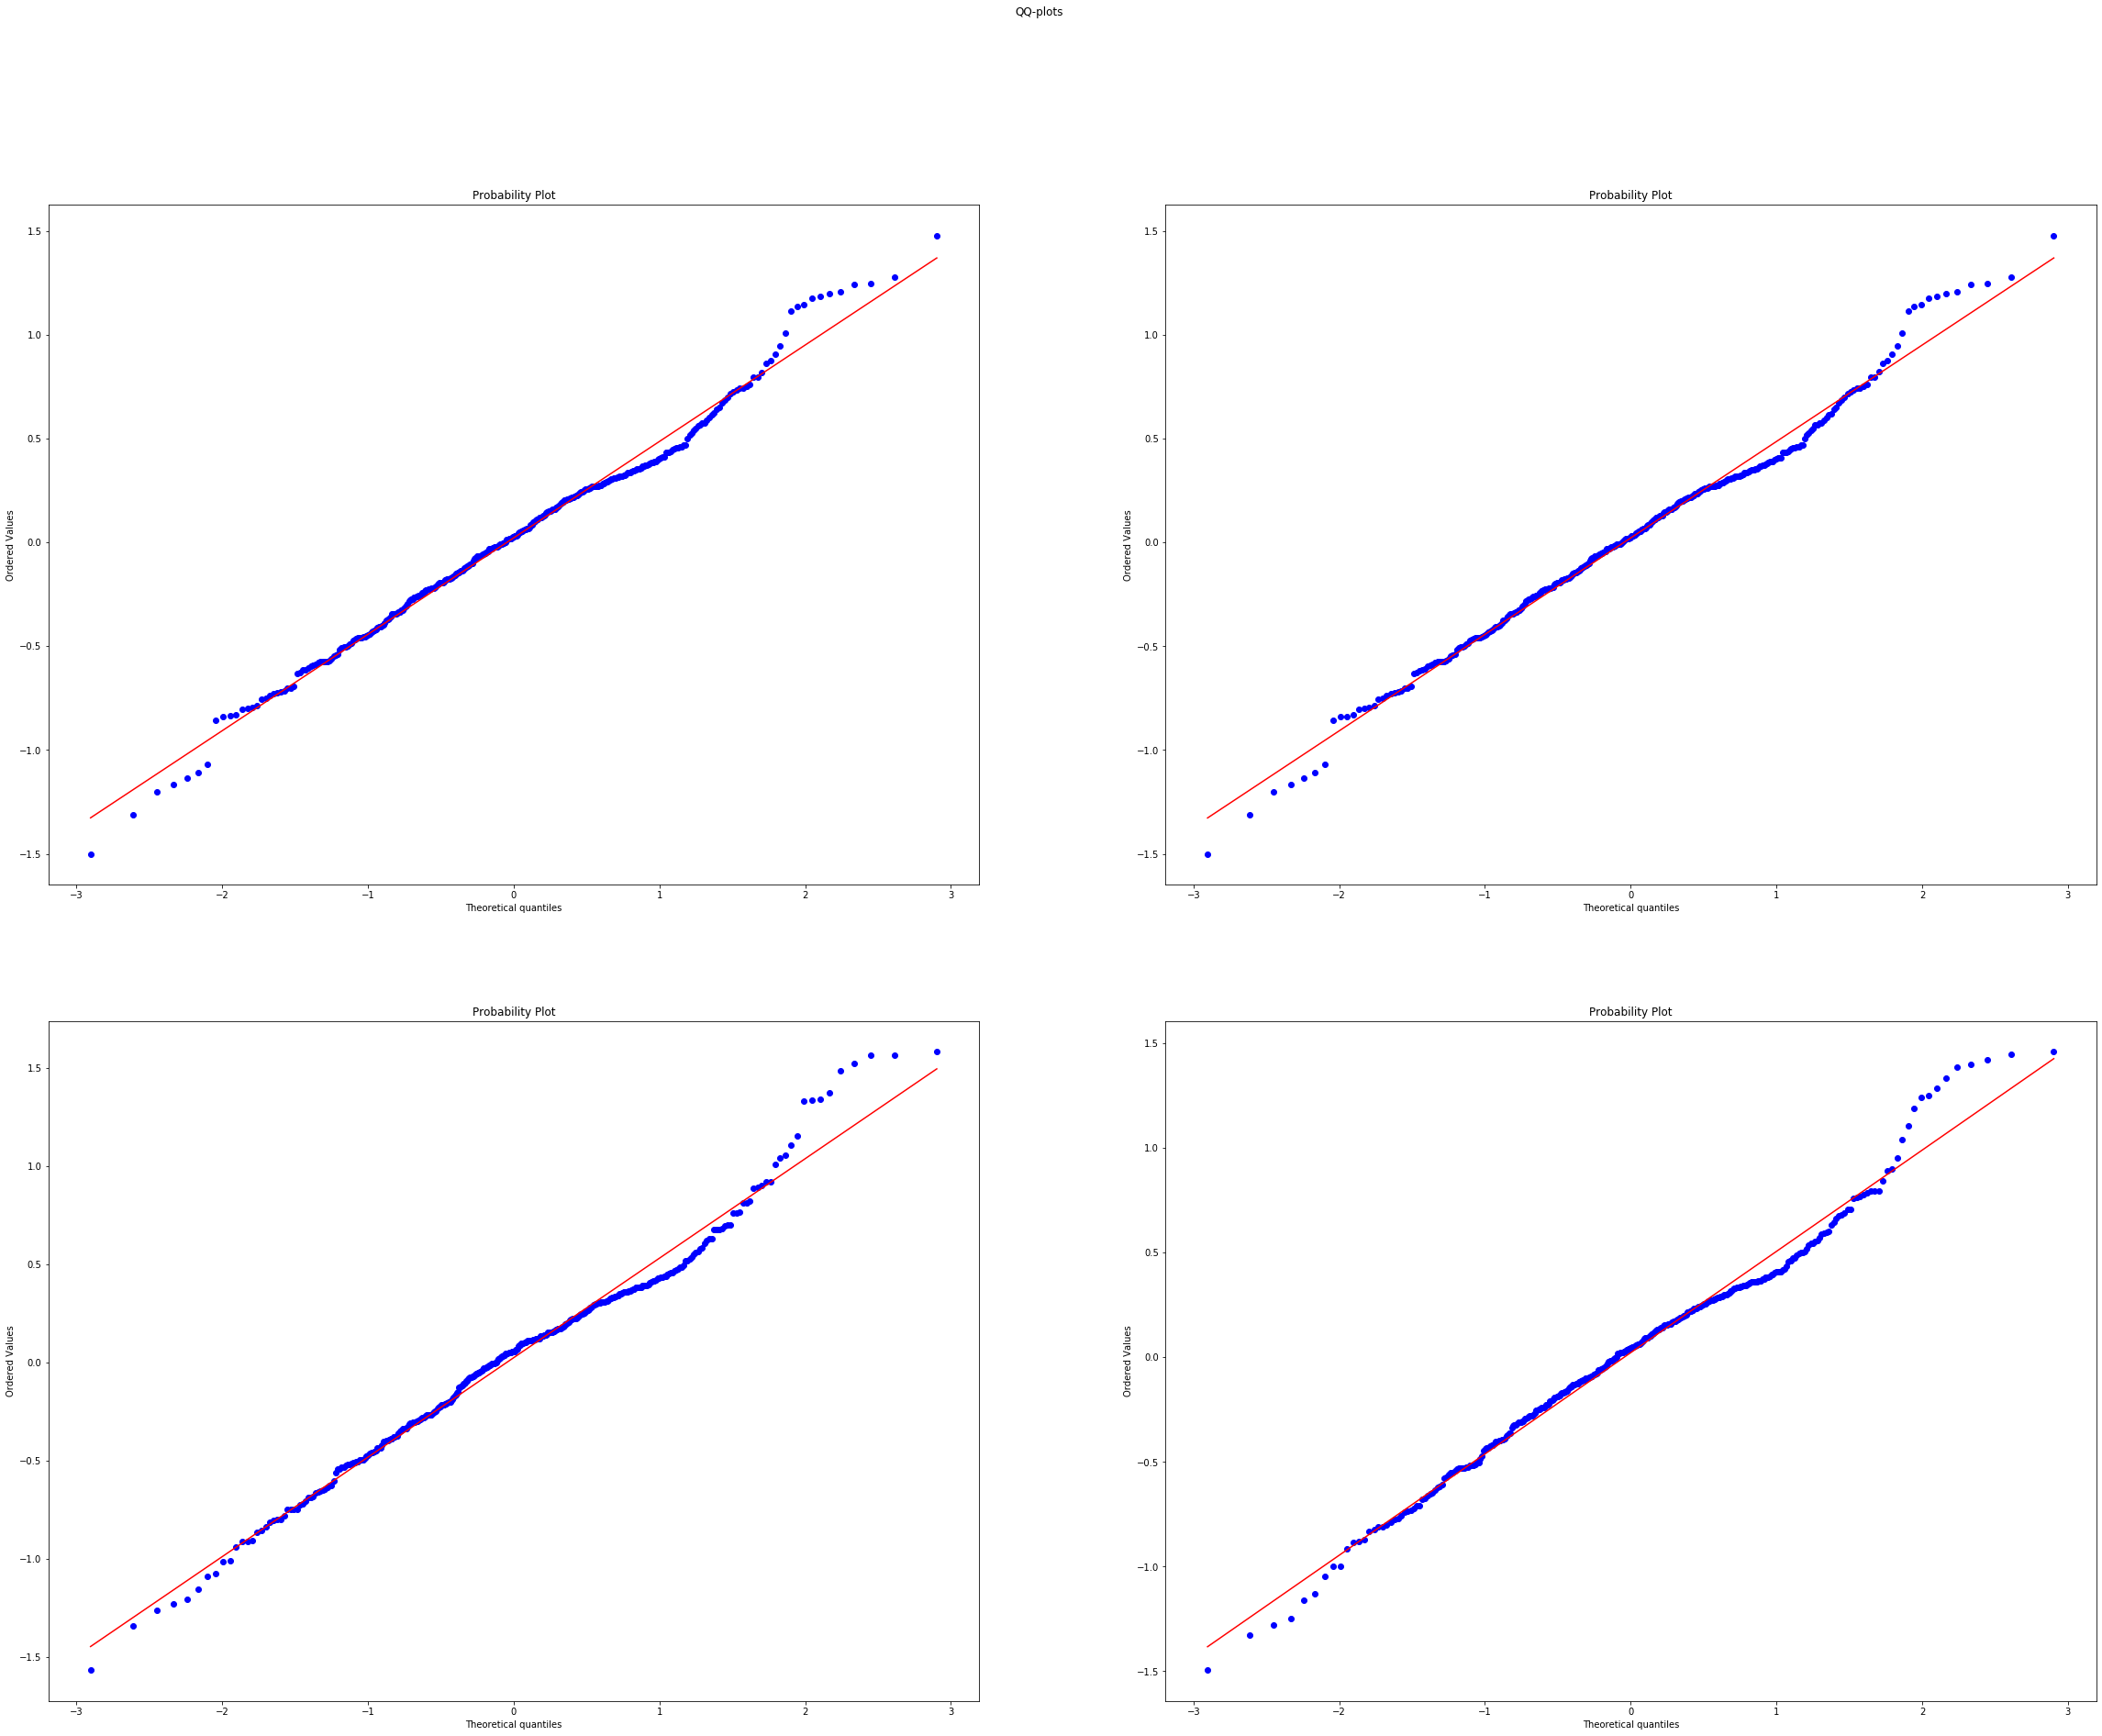

In [60]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(40, 30))
fig.suptitle('QQ-plots')
ax1 = plt.subplot(221)
stats.probplot(linear_residuals, plot=plt)
ax2 = plt.subplot(222)
stats.probplot(cross_ridge_residuals, plot=plt)
ax3 = plt.subplot(223)
stats.probplot(cross_lasso_residuals, plot=plt)
ax4 = plt.subplot(224)
stats.probplot(cross_elastic_residuals, plot=plt)
# plt.show()
plt.savefig('qq_plot.png')